In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import cv2
from PIL import Image


In [2]:
#Reading CSV file data
my_data=pd.read_csv('../data/image_data.csv')

In [3]:
my_data.head()

,FileName,Label,Format
0,Cov-Atlas+(44)V,covid,jpg
1,Cov-Atlas+(45)V,covid,jpg
2,Cov-Atlas-+(43)V,covid,jpg
3,Cov-Atlas-Day+1V,covid,jpg
4,Cov-Atlas-Day+2V,covid,jpg


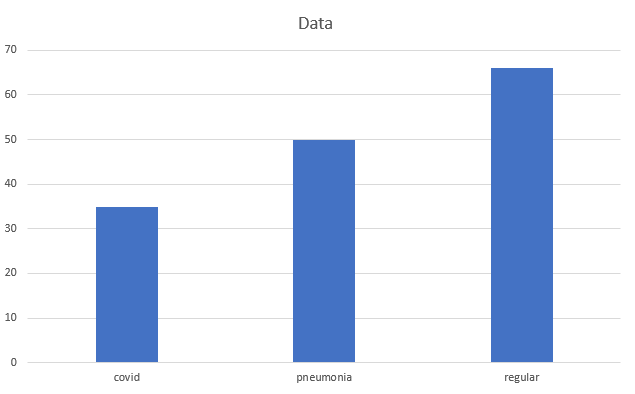

In [4]:
#35 covid - 50 pneu - 66 regular
Image.open('../picturepervideodata.png')

In [5]:
#Setting path for our convex image dataset
images_path='../data/pocus_images/convex/'

In [6]:
#Converting our data into a numpy array to be able to access it more freely
data_array=my_data.to_numpy()

# Image Preprocessing

In [7]:
#Increasing Images contrast- resizing images to 224x224 - Incrasing Image contrast
images_data=[]
for i in data_array:
    img = cv2.imread(images_path+i[0]+'.'+i[2], cv2.IMREAD_GRAYSCALE)
    img=cv2.equalizeHist(img)
    img=cv2.resize(img, (224,224), interpolation = cv2.INTER_AREA)
    img_1d=img.reshape(224*224)
    images_data.append(img_1d)

### Initializing our X and y

In [8]:
#Initializing our X and y for our model
X=np.asarray(images_data)
y=np.asarray(my_data['Label'])

In [9]:
X.shape

(151, 50176)

In [10]:
y.shape

(151,)

In [11]:
# Splitting our set to Train and test  80 20
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
X_train.shape

(120, 50176)

# SVM Model

In [13]:
#Trying out support vector machine model
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import f1_score
from sklearn import metrics

svm_clf = make_pipeline(StandardScaler(), SVC(gamma='auto',random_state=42))

In [14]:
svm_clf.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(gamma='auto', random_state=42))])

In [15]:
# 5 fold cross validation 72.8
cross_validate(svm_clf,X_train,y_train,cv=5,scoring="accuracy")

{'fit_time': array([0.75897193, 0.7968719 , 0.71708226, 0.71309566, 0.73703146]),
 'score_time': array([0.17453289, 0.18749833, 0.17453551, 0.16954684, 0.17752528]),
 'test_score': array([0.79166667, 0.79166667, 0.79166667, 0.66666667, 0.75      ])}

In [16]:
y_train_predict_2=cross_val_predict(svm_clf,X_train,y_train,cv=5)
conf_matrix=confusion_matrix(y_train,y_train_predict_2)
conf_matrix

array([[15,  7,  4],
       [ 1, 30,  8],
       [ 4,  5, 46]], dtype=int64)

<ipython-input-17-c5a8e6bca70d>:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['']+alpha)
<ipython-input-17-c5a8e6bca70d>:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['']+alpha)


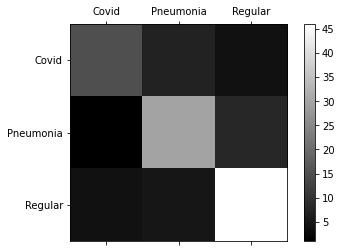

In [17]:
alpha = ['Covid','Pneumonia','Regular']
fig = plt.figure()
ax = fig.add_subplot(111)
cax=ax.matshow(conf_matrix, cmap=plt.cm.gray)
fig.colorbar(cax)
ax.set_xticklabels(['']+alpha)
ax.set_yticklabels(['']+alpha)
plt.show()

In [18]:
print(metrics.classification_report(y_train, y_train_predict_2, digits=3))

              precision    recall  f1-score   support

       covid      0.750     0.577     0.652        26
   pneumonia      0.714     0.769     0.741        39
     regular      0.793     0.836     0.814        55

    accuracy                          0.758       120
   macro avg      0.752     0.728     0.736       120
weighted avg      0.758     0.758     0.755       120



In [19]:
cross_validate(svm_clf,X_test,y_test,cv=5,scoring="accuracy")

{'fit_time': array([0.10574436, 0.09377527, 0.09773827, 0.09776616, 0.09676886]),
 'score_time': array([0.01792455, 0.01593161, 0.01695585, 0.01692748, 0.01892257]),
 'test_score': array([0.85714286, 0.66666667, 0.83333333, 0.66666667, 0.66666667])}

In [23]:
y_train_predict_2=cross_val_predict(svm_clf,X_test,y_test,cv=5)
conf_matrix=confusion_matrix(y_test,y_train_predict_2)
conf_matrix

array([[ 4,  3,  2],
       [ 1, 10,  0],
       [ 1,  1,  9]], dtype=int64)

In [22]:
print(metrics.classification_report(y_test, y_train_predict_2, digits=3))

              precision    recall  f1-score   support

       covid      0.667     0.444     0.533         9
   pneumonia      0.714     0.909     0.800        11
     regular      0.818     0.818     0.818        11

    accuracy                          0.742        31
   macro avg      0.733     0.724     0.717        31
weighted avg      0.737     0.742     0.729        31

